## ANS_2
(2) Using steepest gradient descent, find the local minimum for the function in the problem 1 (i.e. J(w1, w2) = (w1 - 10 )^2 + (w2 - 10)^2). While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show the minimal point in that direction.

IMP NOTE: Plan your coding in such a way so that you can reuse them (use classes / functions). For example, code developed for problem 1 can be used to solve part of problem 2. Similarly, when you do the problems in ML, both multivariable and single variable optimization play greater role. You can use most of the code that you write today to do the problems in the coming weeks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(w):       # Function
    return (w[0]-10)**2+(w[1]-10)**2

In [4]:
def gradf(w):         #Gardiant of function f
    return np.array([2*(w[0]-10),2*(w[1]-10)])

In [5]:
w_0=np.array([2,5])  #Initial guess

## (a)

In [6]:
def SteepestDescent(f,gradf,initialGuess=np.array([0,0]),iterations=1000,tolerance=10**-5,StepL=1):
    x=np.linspace(-1,21,1000)
    y=np.linspace(-1,21,1000)
    xx,yy=np.meshgrid(x,y)
    zz=f(np.array([xx,yy]))
    cp=plt.contour(xx,yy,zz,30)
    plt.clabel(cp,fontsize=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plots')
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        p=-gradf(w_0)
        plt.plot([w_0[0],(w_0+StepL*p)[0]], [w_0[1],(w_0+StepL*p)[1]], linestyle="-")
        #plt.arrow(x=w_0[0],y=w_0[1],dx=(w_0+1/10*p)[0],dy=(w_0+1/10*p)[1],head_width=1,head_length=0.5,length_includes_head=True,color='green')  # in the opposite direction of gradiant
        plt.plot(w_0[0],w_0[1],color='red',marker='*',markersize=4)
        w_0=w_0+StepL*p
        #print(p)
        #print(w_0)
        #print(np.linalg.norm(p))
        #print(f(w_0))
        k=k+1
    plt.annotate('Minimum value in Stepest descent direction', xy=(w_0[0], w_0[1]), xytext=(w_0[0]-3, w_0[1]+3),
            arrowprops=dict(facecolor='green',shrink=0.05))
    plt.show()
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)
 


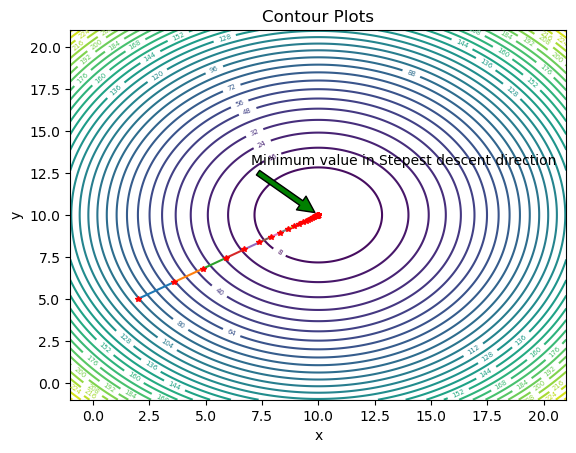

minimum value will be: 2.244338272332165e-11 at [9.99999598 9.99999749] Number of iterations: 65


In [7]:
value=SteepestDescent(f,gradf,initialGuess=w_0,StepL=1/10)


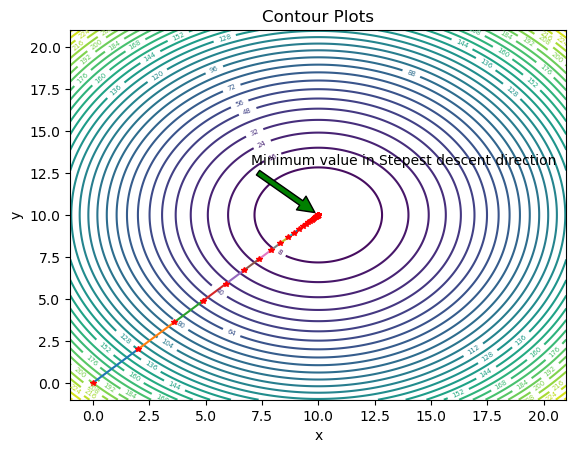

minimum value will be: 2.0657999017089398e-11 at [9.99999679 9.99999679] Number of iterations: 67


In [8]:
value=SteepestDescent(f,gradf,StepL=1/10)

## (b)

In [15]:
def LineSearch(f,gradf,initialGuess=np.array([0,0]),iterations=1000,tolerance=10**-4):
    x=np.linspace(-1,21,1000)
    y=np.linspace(-1,21,1000)
    xx,yy=np.meshgrid(x,y)
    zz=f(np.array([xx,yy]))
    cp=plt.contour(xx,yy,zz,30)
    plt.clabel(cp,fontsize=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plots')
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        StepL=0.2
        while f(w_0-StepL*gradf(w_0))>f(w_0)-0.0001*StepL*np.linalg.norm(gradf(w_0)):   #Calculating Step length
            StepL=StepL/2
            #print('Updated')
        p=-gradf(w_0)
        plt.plot([w_0[0],(w_0+StepL*p)[0]], [w_0[1],(w_0+StepL*p)[1]], linestyle="-")
        #plt.arrow(x=w_0[0],y=w_0[1],dx=(w_0+1/10*p)[0],dy=(w_0+1/10*p)[1],head_width=1,head_length=0.5,length_includes_head=True,color='green')  # in the opposite direction of gradiant
        plt.plot(w_0[0],w_0[1],color='red',marker='*',markersize=4)
        w_0=w_0+StepL*p
        #print(p)
        #print(w_0)
        #print(np.linalg.norm(p))
        #print(f(w_0))
        k=k+1
    plt.annotate('Minimum value in Stepest descent direction', xy=(w_0[0], w_0[1]), xytext=(w_0[0]-3, w_0[1]+3),
            arrowprops=dict(facecolor='green',shrink=0.05))
    plt.show()
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)
 

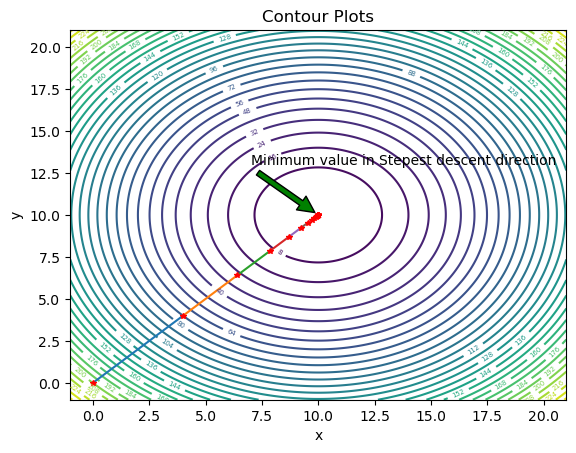

minimum value will be: 1.6165625548884375e-09 at [9.99997157 9.99997157] Number of iterations: 25


In [16]:
value=LineSearch(f,gradf)
